In [ ]:
#Rutvik and Datta
#!gdown 1mb2WfZuYU23nfFcrJ-fvtwV-3KLt-wDC -O source.jpeg
#gdown 1B0bpZQ-JhdNMyUvNoBS6spx0RcjF9whF -O target.jpeg

In [ ]:
'''#Shilajit and Amit
!gdown 1ZVeaxstKpyWXd8cnUg6b_ndneatsZHSA -O source.jpeg
!gdown 1Pz4jw4jWfn9C2idYQqkPLN0hPNCy4HyB -O target.jpeg
'''

'#Shilajit and Amit\n!gdown 1ZVeaxstKpyWXd8cnUg6b_ndneatsZHSA -O source.jpeg\n!gdown 1Pz4jw4jWfn9C2idYQqkPLN0hPNCy4HyB -O target.jpeg\n'

# Generating 10 images from StyleGAN

In [ ]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 1.12 MiB | 21.66 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [ ]:
%cd stylegan2-ada-pytorch

/content/stylegan2-ada-pytorch


In [ ]:
!pip install ninja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 1.6 MB/s eta 0:00:00


In [ ]:
!python generate.py --outdir=out --trunc=1 --seeds=85,265,297,849,346,781,983,70,23,67,89 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl"...
Generating image for seed 85 (0/11) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 265 (1/11) ...
Generating image for seed 297 (2/11) ...
Generating image for seed 849 (3/11) ...
Generating image for seed 346 (4/11) ...
Generating image for seed 781 (5/11) ...
Generating image for seed 983 (6/11) ...
Generating image for seed 70 (7/11) ...
Generating image for seed 23 (8/11) ...
Generating image for seed 67 (9/11) ...
Generating image for seed 89 (10/11) ...


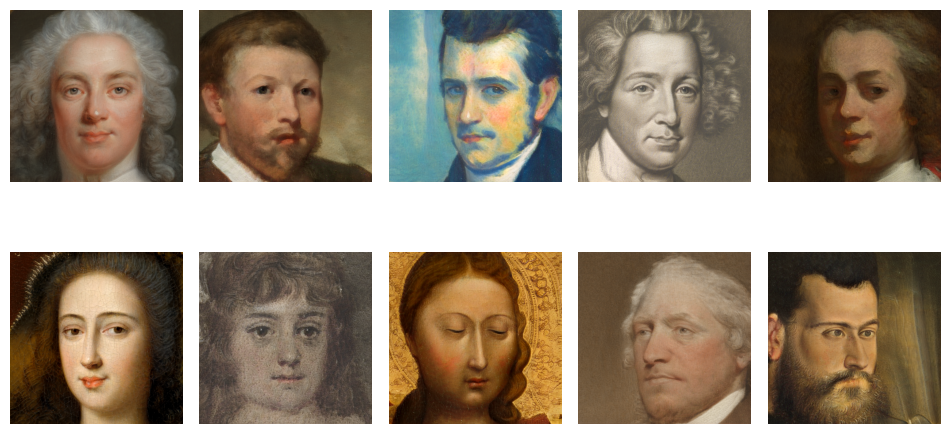

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

img_dir = '/content/stylegan2-ada-pytorch/out'
num_images = 10
num_cols = 5

fig, axs = plt.subplots(2, num_cols, figsize=(12, 6))

for i, img_file in enumerate(os.listdir(img_dir)[:num_images]):
    img = mpimg.imread(os.path.join(img_dir, img_file))
    r, c = divmod(i, num_cols)
    axs[r, c].imshow(img)
    axs[r, c].axis('off')
    
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# Linear Interpolation Between Two Faces

In [ ]:
!wget -q http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_5_face_landmarks.dat.bz2

In [ ]:
import sys
sys.path.insert(0, "/content/stylegan2-ada-pytorch")

In [ ]:
import cv2
import numpy as np
from PIL import Image
import dlib
from matplotlib import pyplot as plt

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')

In [ ]:
def find_eyes(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects = detector(gray, 0)
  
  if len(rects) == 0:
    raise ValueError("No faces detected")
  elif len(rects) > 1:
    raise ValueError("Multiple faces detected")

  shape = predictor(gray, rects[0])
  features = []

  for i in range(0, 5):
    features.append((i, (shape.part(i).x, shape.part(i).y)))

  return (int(features[3][1][0] + features[2][1][0]) // 2, \
    int(features[3][1][1] + features[2][1][1]) // 2), \
    (int(features[1][1][0] + features[0][1][0]) // 2, \
    int(features[1][1][1] + features[0][1][1]) // 2)

def crop_stylegan(img):
  left_eye, right_eye = find_eyes(img)
  # Calculate the size of the face
  d = abs(right_eye[0] - left_eye[0])
  z = 255/d
  # Consider the aspect ratio
  ar = img.shape[0]/img.shape[1]
  w = img.shape[1] * z
  img2 = cv2.resize(img, (int(w), int(w*ar)))
  bordersize = 1024
  img3 = cv2.copyMakeBorder(
      img2,
      top=bordersize,
      bottom=bordersize,
      left=bordersize,
      right=bordersize,
      borderType=cv2.BORDER_REPLICATE)

  left_eye2, right_eye2 = find_eyes(img3)

  # Adjust to the offset used by StyleGAN2
  crop1 = left_eye2[0] - 385 
  crop0 = left_eye2[1] - 490
  return img3[crop0:crop0+1024,crop1:crop1+1024]

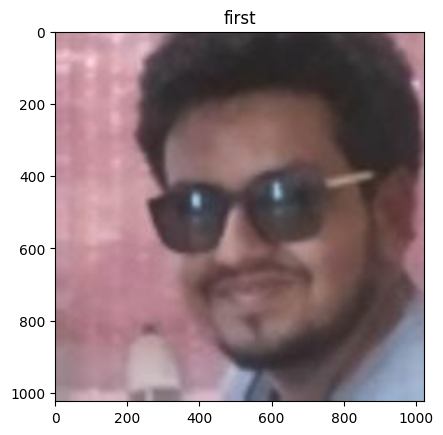

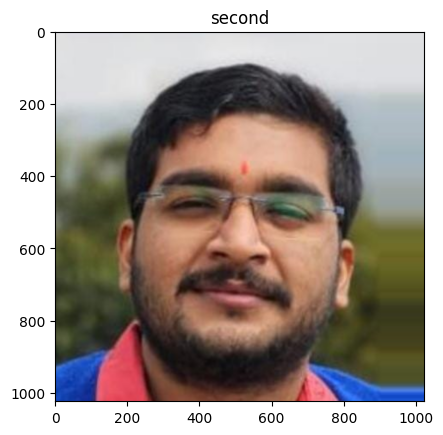

True

In [ ]:
image_source = cv2.imread('/content/swapnil.jpeg')
image_target = cv2.imread('/content/rohan.jpeg')

cropped_source = crop_stylegan(image_source)
cropped_target = crop_stylegan(image_target)

img = cv2.cvtColor(cropped_source, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('first')
plt.show()

img = cv2.cvtColor(cropped_target, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('second')
plt.show()

cv2.imwrite("cropped_source.png", cropped_source)
cv2.imwrite("cropped_target.png", cropped_target)

In [ ]:
!python /content/stylegan2-ada-pytorch/projector.py --save-video 0 --num-steps 1000 --outdir=out_source --target=cropped_source.png --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1501: UserWarning: operator() profile_node %106 : int = prim::profile_ivalue(%104)
 does not have profile information (Triggered internally at ../third_party/nvfuser/csrc/graph_fuser.cpp:104.)
  return forward_call(*args, **kwargs)
step    1/1000: dist 0.74 loss 24567.41
step    2/1000: dist 0.87 loss 27640.85
step    3/1000: dist 0.85 loss 27166.96
step    4/1000: dist 0.62 loss 26253.41
step    5/1000: dist 0.68 loss 24957.29
step    6/1000: dist 0.71 loss 23352.25
step    7/1000: dist 0.61 loss 21510.77
step    8/1000: dist 0.68 loss 19486.95
step    9/1000: dist 0.71 loss 17341.64
step   10/1000: dist 0.68 loss 15140.46
step   11/1000: dist 0.63 loss 12947.

In [ ]:
!python /content/stylegan2-ada-pytorch/projector.py --save-video 0 --num-steps 1000 --outdir=out_target --target=cropped_target.png --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1501: UserWarning: operator() profile_node %106 : int = prim::profile_ivalue(%104)
 does not have profile information (Triggered internally at ../third_party/nvfuser/csrc/graph_fuser.cpp:104.)
  return forward_call(*args, **kwargs)
step    1/1000: dist 0.67 loss 24567.33
step    2/1000: dist 0.65 loss 27640.62
step    3/1000: dist 0.68 loss 27166.80
step    4/1000: dist 0.61 loss 26253.40
step    5/1000: dist 0.62 loss 24957.23
step    6/1000: dist 0.71 loss 23352.25
step    7/1000: dist 0.66 loss 21510.81
step    8/1000: dist 0.62 loss 19486.89
step    9/1000: dist 0.56 loss 17341.50
step   10/1000: dist 0.59 loss 15140.38
step   11/1000: dist 0.61 loss 12947.

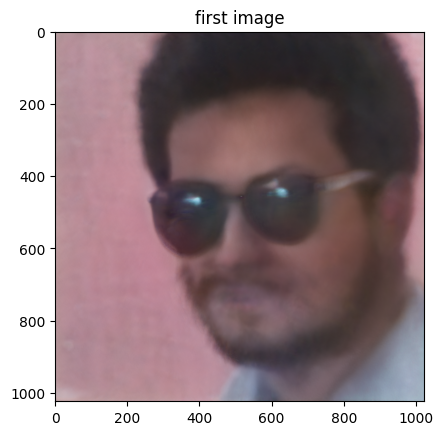

In [ ]:
img_gan_source = cv2.imread('/content/stylegan2-ada-pytorch/out_source/proj.png')
img = cv2.cvtColor(img_gan_source, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('first image')
plt.show()

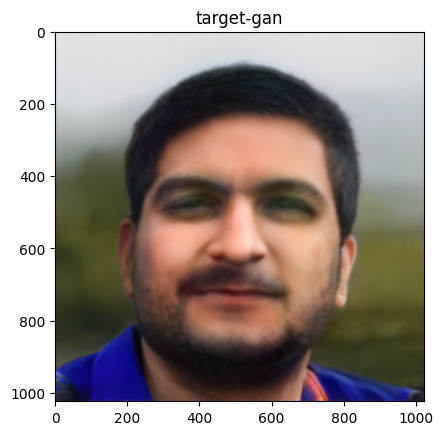

In [ ]:
img_gan_target = cv2.imread('/content/stylegan2-ada-pytorch/out_target/proj.png')
img = cv2.cvtColor(img_gan_target, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('target-gan')
plt.show()

In [ ]:
!mkdir face_out

mkdir: cannot create directory ‘face_out’: File exists


In [ ]:
import torch
import dnnlib
import legacy
import PIL.Image
import numpy as np
import imageio
from tqdm.notebook import tqdm

lvec1 = np.load('/content/stylegan2-ada-pytorch/out_source/projected_w.npz')['w']
lvec2 = np.load('/content/stylegan2-ada-pytorch/out_target/projected_w.npz')['w']

network_pkl = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"
device = torch.device('cuda')
with dnnlib.util.open_url(network_pkl) as fp:
    G = legacy.load_network_pkl(fp)['G_ema'].requires_grad_(False).to(device) # type: ignore

diff = lvec2 - lvec1
step = diff / 8  # there will be 5 interpolated images in between the source and target images
current = lvec1.copy()

# Save the source image
z = torch.from_numpy(lvec1).to(device)
synth_image = G.synthesis(z, noise_mode='const')
synth_image = (synth_image + 1) * (255/2)
synth_image = synth_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
PIL.Image.fromarray(synth_image).save('/content/source_image.png')

# Save the target image
z = torch.from_numpy(lvec2).to(device)
synth_image = G.synthesis(z, noise_mode='const')
synth_image = (synth_image + 1) * (255/2)
synth_image = synth_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
PIL.Image.fromarray(synth_image).save('/content/target_image.png')

# Save the interpolated images
for j in tqdm(range(1, 9)):
    current += step
    z = torch.from_numpy(current).to(device)
    synth_image = G.synthesis(z, noise_mode='const')
    synth_image = (synth_image + 1) * (255/2)
    synth_image = synth_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
    PIL.Image.fromarray(synth_image).save(f'/content/stylegan2-ada-pytorch/face_out/interpolated_image{j}.png')

  0%|          | 0/8 [00:00<?, ?it/s]

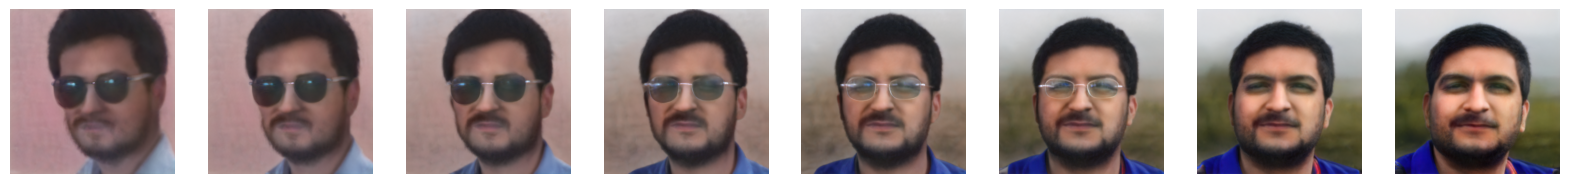

In [ ]:
import os
import matplotlib.pyplot as plt

folder_path = '/content/stylegan2-ada-pytorch/face_out'
images = sorted(os.listdir(folder_path))[:8]

fig, axs = plt.subplots(1, 8, figsize=(20, 4))
for i, img_file in enumerate(images):
    img_path = os.path.join(folder_path, img_file)
    img = plt.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()


In [1]:
image_source = cv2.imread('/content/swapnil.jpeg')
image_target = cv2.imread('/content/rohan.jpeg')

cropped_source = crop_stylegan(image_source)
cropped_target = crop_stylegan(image_target)

img = cv2.cvtColor(cropped_source, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('first')
plt.show()

img = cv2.cvtColor(cropped_target, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('second')
plt.show()

cv2.imwrite("cropped_source.png", cropped_source)
cv2.imwrite("cropped_target.png", cropped_target)
!python /content/stylegan2-ada-pytorch/projector.py --save-video 0 --num-steps 1000 --outdir=out_source --target=cropped_source.png --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
!python /content/stylegan2-ada-pytorch/projector.py --save-video 0 --num-steps 1000 --outdir=out_target --target=cropped_target.png --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
!mkdir face_out
import torch
import dnnlib
import legacy
import PIL.Image
import numpy as np
import imageio
from tqdm.notebook import tqdm

lvec1 = np.load('/content/stylegan2-ada-pytorch/out_source/projected_w.npz')['w']
lvec2 = np.load('/content/stylegan2-ada-pytorch/out_target/projected_w.npz')['w']

network_pkl = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"
device = torch.device('cuda')
with dnnlib.util.open_url(network_pkl) as fp:
    G = legacy.load_network_pkl(fp)['G_ema'].requires_grad_(False).to(device) # type: ignore

diff = lvec2 - lvec1
step = diff / 8  # there will be 5 interpolated images in between the source and target images
current = lvec1.copy()

# Save the source image
z = torch.from_numpy(lvec1).to(device)
synth_image = G.synthesis(z, noise_mode='const')
synth_image = (synth_image + 1) * (255/2)
synth_image = synth_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
PIL.Image.fromarray(synth_image).save('/content/source_image.png')

# Save the target image
z = torch.from_numpy(lvec2).to(device)
synth_image = G.synthesis(z, noise_mode='const')
synth_image = (synth_image + 1) * (255/2)
synth_image = synth_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
PIL.Image.fromarray(synth_image).save('/content/target_image.png')

# Save the interpolated images
for j in tqdm(range(1, 9)):
    current += step
    z = torch.from_numpy(current).to(device)
    synth_image = G.synthesis(z, noise_mode='const')
    synth_image = (synth_image + 1) * (255/2)
    synth_image = synth_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
    PIL.Image.fromarray(synth_image).save(f'/content/stylegan2-ada-pytorch/face_out/interpolated_image{j}.png')
import os
import matplotlib.pyplot as plt

folder_path = '/content/stylegan2-ada-pytorch/face_out'
images = sorted(os.listdir(folder_path))[:8]

fig, axs = plt.subplots(1, 8, figsize=(20, 4))
for i, img_file in enumerate(images):
    img_path = os.path.join(folder_path, img_file)
    img = plt.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()


NameError: ignored